# <center>Random Forest Classifier

**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [17]:
diabetes = pd.read_csv('diabetes.csv')
diabetes
# diabetes.info()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,0,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180,32.9,0.171,63.0,0
764,2,122.0,70.0,27,0,36.8,0.340,27.0,0
765,5,121.0,72.0,23,112,26.2,0.245,30.0,0
766,1,126.0,60.0,0,0,30.1,0.349,47.0,1


In [3]:
diabetes.isnull().sum() #null values in dataset

Pregnancies                 0
Glucose                     2
BloodPressure               1
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    1
Age                         1
Outcome                     0
dtype: int64

In [4]:
diabetes=diabetes.dropna(axis=0)
diabetes.shape

(763, 9)

In [5]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Training The Model**

In [6]:
X_train=diabetes.loc[:0.7*diabetes.shape[0]-1,:'Age']
X_test=diabetes.loc[0.7*diabetes.shape[0]:,:'Age']

Y_train=diabetes.loc[:0.7*diabetes.shape[0]-1,'Outcome']
Y_test=diabetes.loc[0.7*diabetes.shape[0]:,'Outcome']

In [7]:
RanForest = RandomForestClassifier(n_estimators=2000)  
RanForest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=2000)

In [8]:
Y_predict=RanForest.predict(X_test)

**Plotting Confusion Matrix**

Accuracy: 0.8034934497816594
F1 score: 0.6808510638297871


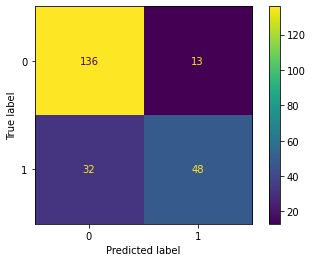

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
print('Accuracy:',accuracy_score(Y_test, Y_predict))
print('F1 score:',f1_score(Y_test, Y_predict))
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_predict)).plot()

**Receiver Operating Characteristic Curve (ROC) and Area Under the Curve (AUC)**

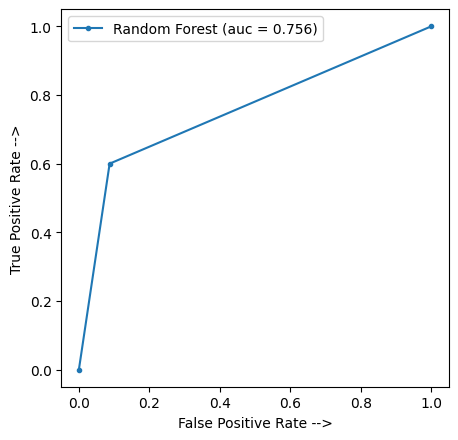

In [10]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(Y_test, Y_predict) #returns False-Positive rate and True-Negative rate
auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, marker='.', label='Random Forest (auc = %0.3f)' % auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()

plt.show()